#  Unsupervised Learning usando la base de datos NCI60
En este jupyter notebook vamos a aprender lo siguiente:

*   Conocer el ambiente Google Colab
*   Usar ***R*** en Google Colab
*   Realizar analisis de componentes principales en la base de datos NCI60
*   Agrupar las observaciones usando Hierarchical Clustering y $k$-means


El código fuente esta basado en el **Laboratorio 3 NCI60 Data Example, Capítulo 10** del libro *Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani - An Introduction to Statistical Learning with Applications in R-Springer (2014)*

## Conociendo el ambiente Google Colab

El ambiente Google Colab nos permite ejecutar codigo ***Python*** en nuestro navegador:
*   Sin ninguna configuración previa
*   Acceso gratuito a GPUs
*   Facil de compartir

Para mayor información, visistar lo siguientes links:
*   [¿Qué es Google Colab?](https://colab.research.google.com/notebooks/intro.ipynb)
*   [¿Como montar el Google Drive para ser usado en Google Colab?](https://colab.research.google.com/notebooks/io.ipynb)

Podemos comenzar a ejecutar algunas operaciones matemáticas en Google Colab.
```python
5+5
```
```python
5*5
```
```python
((5+5)*5+20)/15
```
Existen 3 métodos para ejecutar una celda:
* Apretar el boton de play al inicio de la celda.
* Presionar ***CTRL + ENTER***.
* Presionar ***SHIFT + ENTER***, lo cual agregará una celda al final.

In [ ]:
((5+5)*5+20)/15

4.666666666666667

## Usando ***R*** en Google Colab

Debido a que inicialmente Google Colab fue creado para programar en lenguaje ***Python***, es necesario configurar el ambiente para poder usar ***R***. Para mayor información, visitar el siguiente link: [Como usar R en Google Colab](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)

Solo será necesario ejecutar la siguiente celda al inicio de cada Google Colab:
```python
%load_ext rpy2.ipython
```
Y adicionar la siguiente linea al inicio de cada celda:
```python
%%R
```
De esa manera Google Colab sabrá que esa celda contiene codigo en lenguaje ***R***.

Ademas, de esta manera podemos ejecutar codigo en ***Python*** y ***R*** en el mismo Google Colab.

In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Ejecutemos las siguientes lineas para conocer la versión de ***R*** con la que estamos trabajando:
```python
%%R
R.version
```

In [ ]:
%%R
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           


## Base de datos NCI60

La base de datos NCI60 consiste en datos de microarrays de líneas de células cancerosas, que constan de 6830 mediciones de expresión génica en 64 líneas de células cancerosas.
* Observaciones: $n=64$
* Atributos: $p=6830$

Para poder usar la base de datos NCI60 en ***R*** necesitamos instalar la libreria **ISLR**.

In [2]:
%%R
install.packages('ISLR')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ISLR_1.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1757568 bytes (1.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [3]:
%%R
library(ISLR)
nci.labs = NCI60$labs
nci.data = NCI60$data
dim(nci.data)

[1]   64 6830


Los siguientes tipos de cancer estan presentes en la base de datos

In [4]:
%%R
nci.labs

 [1] "CNS"         "CNS"         "CNS"         "RENAL"       "BREAST"     
 [6] "CNS"         "CNS"         "BREAST"      "NSCLC"       "NSCLC"      
[11] "RENAL"       "RENAL"       "RENAL"       "RENAL"       "RENAL"      
[16] "RENAL"       "RENAL"       "BREAST"      "NSCLC"       "RENAL"      
[21] "UNKNOWN"     "OVARIAN"     "MELANOMA"    "PROSTATE"    "OVARIAN"    
[26] "OVARIAN"     "OVARIAN"     "OVARIAN"     "OVARIAN"     "PROSTATE"   
[31] "NSCLC"       "NSCLC"       "NSCLC"       "LEUKEMIA"    "K562B-repro"
[36] "K562A-repro" "LEUKEMIA"    "LEUKEMIA"    "LEUKEMIA"    "LEUKEMIA"   
[41] "LEUKEMIA"    "COLON"       "COLON"       "COLON"       "COLON"      
[46] "COLON"       "COLON"       "COLON"       "MCF7A-repro" "BREAST"     
[51] "MCF7D-repro" "BREAST"      "NSCLC"       "NSCLC"       "NSCLC"      
[56] "MELANOMA"    "BREAST"      "BREAST"      "MELANOMA"    "MELANOMA"   
[61] "MELANOMA"    "MELANOMA"    "MELANOMA"    "MELANOMA"   


La distribución de observaciones por cada tipo de cancer es la siguiente:

In [6]:
%%R
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 


## Principal Component Analysis (PCA) en NCI60

Usando la función ***prcomp*** de ***R*** para calcular los componentes principales

In [32]:
%%R
pr.out = prcomp(nci.data, scale=TRUE)

### Visualizando los 3 primeros componentes principales

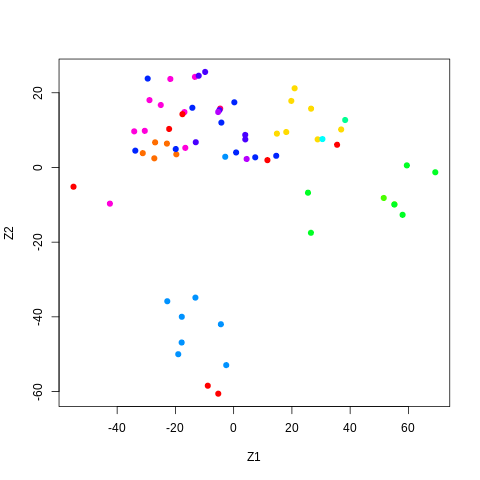

In [40]:
%%R
Cols = function(vec){
    cols = rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19, xlab="Z1", ylab="Z2")

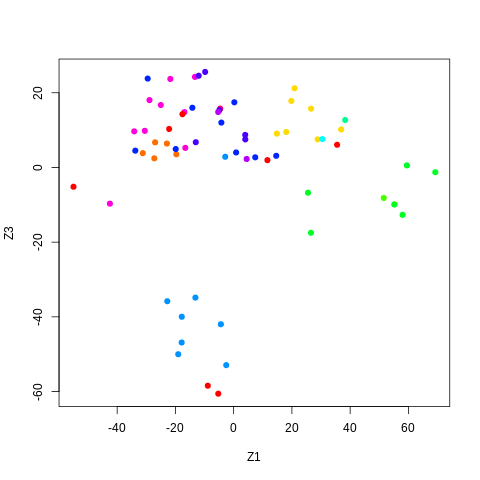

In [35]:
%%R
plot(pr.out$x[,c(1:3)], col=Cols(nci.labs), pch=19, xlab="Z1", ylab="Z3")

Resumen de los 64 componentes principales

In [42]:
%%R
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

### Porcentaje de información contenida en cada componente principal
Podemos observar que las primeras 7 componentes principales contienen un porcentaje signiticativo de la información.  

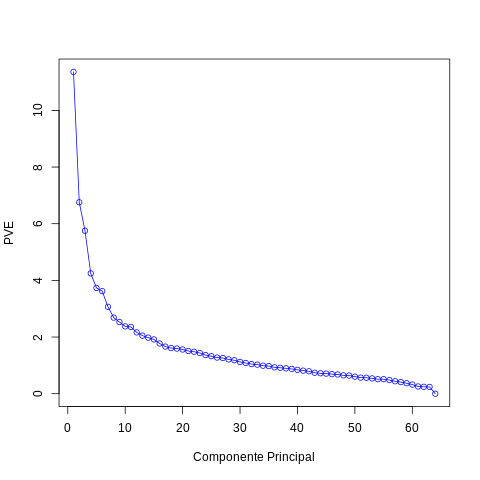

In [38]:
%%R
pve = 100*pr.out$sdev^2/sum(pr.out$sdev^2)
plot(pve, type="o", ylab="PVE", xlab="Componente Principal", col="blue")

Hasta la 7ma componente principal se tiene aproximadamente 40% de la información.

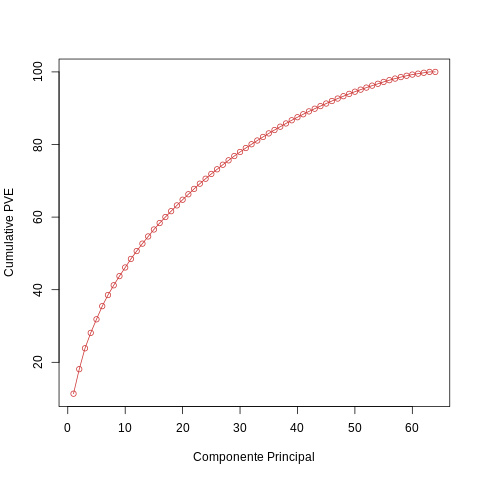

In [39]:
%%R
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Componente Principal", col="brown3")

## Hierarchical Clustering

Vamos a escalar las observaciones y usar la funciòn ***hclust*** para hacer Hierarchical Clustering.

In [5]:
%%R
sd.data = scale(nci.data)
data.dist = dist(sd.data)

hc.complete = hclust(data.dist, method="complete")
hc.average = hclust(data.dist, method="average")
hc.single = hclust(data.dist, method="single")

### Visualizando los Dendrogramas

Dendrograma con Complete $linkage$

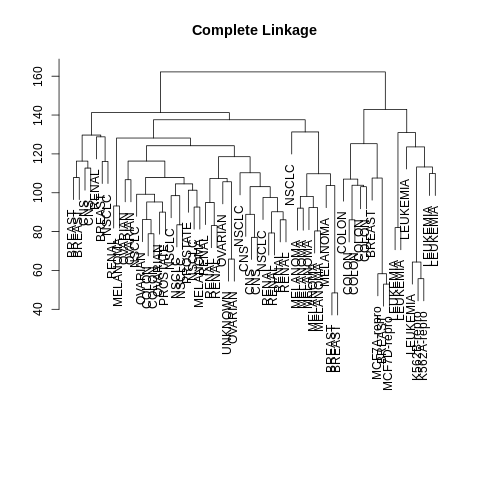

In [21]:
%%R
plot(hc.complete, labels=nci.labs, main="Complete Linkage", xlab="", sub="", ylab="")

Dendrograma con Average $linkage$

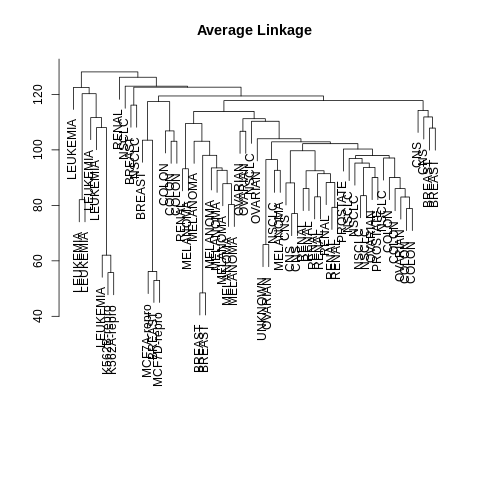

In [22]:
%%R
plot(hc.average, labels=nci.labs, main="Average Linkage", xlab="", sub="", ylab="")

Dendrograma con Single $linkage$

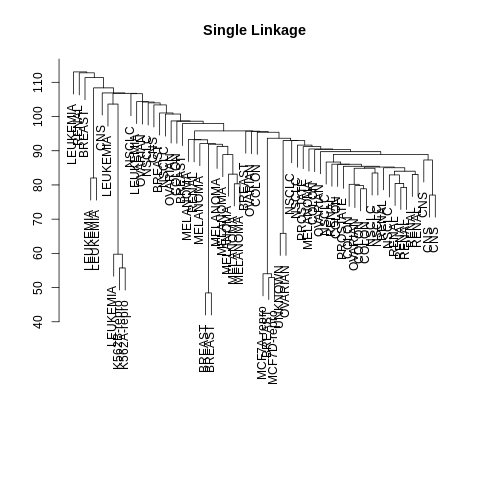

In [23]:
%%R
plot(hc.single, labels=nci.labs, main="Single Linkage", xlab="", sub="", ylab="")

### Corte en el Dendrograma

Haciendo un corte para obtener 4 clusters podemos ver ciertos patrones

In [24]:
%%R
hc.clusters = cutree(hc.complete, 4)
table(hc.clusters, nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0


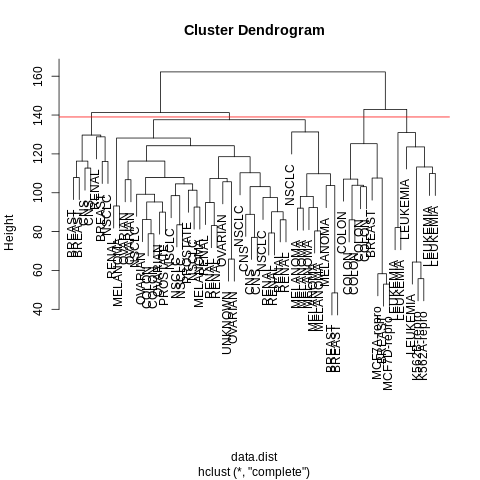

In [26]:
%%R
plot(hc.complete, labels=nci.labs)
abline(h=139, col="red")

## $k$-means

Comparando los clusters obtenidos usando Hierarchical Clustering y $k$-means

In [28]:
%%R
sd.data = scale(nci.data)
set.seed(2)
km.out = kmeans(sd.data, 4, nstart=20)
km.clusters = km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0
